# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization

---

## 1. Import packages

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from simple_colors import * 
import warnings
warnings.filterwarnings("ignore")

In [118]:
raw = pd.read_csv("Customers.csv")

In [120]:
pro= pd.read_csv("Products.csv")

In [122]:
 tran= pd.read_csv("Transactions.csv")

In [124]:
raw.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [126]:
pro.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [128]:
tran.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


---

## 3. Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [131]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [133]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [135]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


### 1. Data Validation
* Checking and validating each & every column data along with data type of column
* Duplicates Rows Handling
    - Checking and droping duplicated rows to overcome data leakage

In [138]:

def colcheck(df, col):
    print("Column: ", col)
    print()
    print(f"Number of Unique Values in Column: {df[col].nunique()}")
    print()
    print("Unique Values in Column:")
    print(df[col].unique())
    print()
    print("Data Type of Column:", df[col].dtype)
    print()
    print("***********************************************************")
    print()

In [140]:
for col in raw.columns:
    colcheck(raw, col)

Column:  CustomerID

Number of Unique Values in Column: 200

Unique Values in Column:
['C0001' 'C0002' 'C0003' 'C0004' 'C0005' 'C0006' 'C0007' 'C0008' 'C0009'
 'C0010' 'C0011' 'C0012' 'C0013' 'C0014' 'C0015' 'C0016' 'C0017' 'C0018'
 'C0019' 'C0020' 'C0021' 'C0022' 'C0023' 'C0024' 'C0025' 'C0026' 'C0027'
 'C0028' 'C0029' 'C0030' 'C0031' 'C0032' 'C0033' 'C0034' 'C0035' 'C0036'
 'C0037' 'C0038' 'C0039' 'C0040' 'C0041' 'C0042' 'C0043' 'C0044' 'C0045'
 'C0046' 'C0047' 'C0048' 'C0049' 'C0050' 'C0051' 'C0052' 'C0053' 'C0054'
 'C0055' 'C0056' 'C0057' 'C0058' 'C0059' 'C0060' 'C0061' 'C0062' 'C0063'
 'C0064' 'C0065' 'C0066' 'C0067' 'C0068' 'C0069' 'C0070' 'C0071' 'C0072'
 'C0073' 'C0074' 'C0075' 'C0076' 'C0077' 'C0078' 'C0079' 'C0080' 'C0081'
 'C0082' 'C0083' 'C0084' 'C0085' 'C0086' 'C0087' 'C0088' 'C0089' 'C0090'
 'C0091' 'C0092' 'C0093' 'C0094' 'C0095' 'C0096' 'C0097' 'C0098' 'C0099'
 'C0100' 'C0101' 'C0102' 'C0103' 'C0104' 'C0105' 'C0106' 'C0107' 'C0108'
 'C0109' 'C0110' 'C0111' 'C0112' 'C011

In [142]:
raw['SignupDate'] = pd.to_datetime(raw['SignupDate'])

In [144]:
raw['SignupDate']

0     2022-07-10
1     2022-02-13
2     2024-03-07
3     2022-10-09
4     2022-08-15
         ...    
195   2022-06-07
196   2023-03-21
197   2022-02-27
198   2022-12-03
199   2023-06-11
Name: SignupDate, Length: 200, dtype: datetime64[ns]

In [146]:
for col in pro.columns:
    colcheck(pro, col)

Column:  ProductID

Number of Unique Values in Column: 100

Unique Values in Column:
['P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009' 'P010'
 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019' 'P020'
 'P021' 'P022' 'P023' 'P024' 'P025' 'P026' 'P027' 'P028' 'P029' 'P030'
 'P031' 'P032' 'P033' 'P034' 'P035' 'P036' 'P037' 'P038' 'P039' 'P040'
 'P041' 'P042' 'P043' 'P044' 'P045' 'P046' 'P047' 'P048' 'P049' 'P050'
 'P051' 'P052' 'P053' 'P054' 'P055' 'P056' 'P057' 'P058' 'P059' 'P060'
 'P061' 'P062' 'P063' 'P064' 'P065' 'P066' 'P067' 'P068' 'P069' 'P070'
 'P071' 'P072' 'P073' 'P074' 'P075' 'P076' 'P077' 'P078' 'P079' 'P080'
 'P081' 'P082' 'P083' 'P084' 'P085' 'P086' 'P087' 'P088' 'P089' 'P090'
 'P091' 'P092' 'P093' 'P094' 'P095' 'P096' 'P097' 'P098' 'P099' 'P100']

Data Type of Column: object

***********************************************************

Column:  ProductName

Number of Unique Values in Column: 66

Unique Values in Column:
['ActiveWear Biography' 'Ac

In [148]:
for col in tran.columns:
    colcheck(tran, col)

Column:  TransactionID

Number of Unique Values in Column: 1000

Unique Values in Column:
['T00001' 'T00112' 'T00166' 'T00272' 'T00363' 'T00442' 'T00490' 'T00536'
 'T00564' 'T00631' 'T00727' 'T00729' 'T00797' 'T00002' 'T00063' 'T00093'
 'T00127' 'T00270' 'T00358' 'T00518' 'T00546' 'T00982' 'T00003' 'T00013'
 'T00017' 'T00046' 'T00091' 'T00161' 'T00184' 'T00218' 'T00417' 'T00492'
 'T00605' 'T00615' 'T00619' 'T00703' 'T00962' 'T00004' 'T00105' 'T00136'
 'T00237' 'T00239' 'T00310' 'T00470' 'T00551' 'T00563' 'T00567' 'T00620'
 'T00650' 'T00818' 'T00923' 'T00970' 'T00005' 'T00037' 'T00206' 'T00208'
 'T00485' 'T00488' 'T00497' 'T00684' 'T00846' 'T00875' 'T00880' 'T00953'
 'T00006' 'T00010' 'T00175' 'T00269' 'T00293' 'T00568' 'T00602' 'T00744'
 'T00952' 'T00968' 'T00007' 'T00089' 'T00158' 'T00349' 'T00455' 'T00501'
 'T00721' 'T00749' 'T00997' 'T00008' 'T00035' 'T00140' 'T00187' 'T00194'
 'T00228' 'T00232' 'T00355' 'T00448' 'T00561' 'T00828' 'T00852' 'T00009'
 'T00155' 'T00644' 'T00685' 'T0080

* We dont need transaction time so removing time data, considering only date for analysis

In [151]:
tran['TransactionDate'] = pd.to_datetime(tran['TransactionDate'])

In [218]:
raw['SignupYear'] = raw['SignupDate'].dt.year
tran['YearMonth'] = tran['TransactionDate'].dt.to_period('M')

In [220]:
for col in raw.columns:
    if raw[col].dtype==object:
        raw[col] = raw[col].str.lower()

In [222]:
for col in pro.columns:
    if pro[col].dtype==object:
        pro[col] = pro[col].str.lower()

In [224]:
for col in tran.columns:
    if tran[col].dtype==object:
        tran[col] = tran[col].str.lower()

In [226]:
raw

,CustomerID,CustomerName,Region,SignupDate,SignupYear
0,c0001,lawrence carroll,south america,2022-07-10,2022
1,c0002,elizabeth lutz,asia,2022-02-13,2022
2,c0003,michael rivera,south america,2024-03-07,2024
3,c0004,kathleen rodriguez,south america,2022-10-09,2022
4,c0005,laura weber,asia,2022-08-15,2022
...,...,...,...,...,...
195,c0196,laura watts,europe,2022-06-07,2022
196,c0197,christina harvey,europe,2023-03-21,2023
197,c0198,rebecca ray,europe,2022-02-27,2022
198,c0199,andrea jenkins,europe,2022-12-03,2022


In [228]:
raw[raw.duplicated()]

,CustomerID,CustomerName,Region,SignupDate,SignupYear


In [230]:
pro[pro.duplicated()]

,ProductID,ProductName,Category,Price


In [232]:
tran[tran.duplicated()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,YearMonth


* No duplicated rows found

### 2. Data Understanding @ EDA (Exploratory Data Analysis)
* **To get Insights on the data we can use eda techniques,**
    - **Uni-Variate Analysis (Study of single column data)**
    - **Bi/Multi-Variate Analysis (Study data between two or more columns)**
* Above techniques will use **Descriptive Stats** & **Visualizations**
    - **Descriptive Stats**
        - Stats Measures are used to understand column data
        - Refer Notes pdf given for uni & bi/multi variate measures.
        - To start with descriptive stats , need to understand types of variables/columns in given data
    - **Visualizations**
        - Pictorial representation of data
            - Descriptive Stats Visual representation

In [236]:
class univariate:
    
    ############################ Numeric Continuous ############################
    def ncstudy(self, df, col):
        print(green("#######################################################",['bold']))
        print(green("Taken Numeric Continuous Column:",['bold']), black(col,['bold']))
        print(green("#######################################################",['bold']))
        print()
        print(cyan("Uni-Variate Descriptive Stats:",['bold']))
        print()
        print(blue("******** Measures of Central Tendancy ************", ['bold']))
        print(magenta("Mean:",['bold']), round(df[col].mean(),2))
        print(magenta("Median:",['bold']), df[col].median())
        print(magenta("Mode:",['bold']), df[col].mode()[0]) # Taking first value
        print()
        print(blue("******** Measures of Dispersion ************",['bold']))
        print(magenta("Range:",['bold']), df[col].max()-df[col].min())
        print(magenta("Variance:",['bold']), round(df[col].var(),2))
        print(magenta("Standard Deviation:",['bold']), round(df[col].std(),2))
        print(magenta("Five Number Summary:",['bold']))
        print(round(df[col].describe(),2)[['min','25%','50%','75%','max']])
        print()
        print(blue("******** Measures of Symmetry ************",['bold']))
        print(magenta("Skewness:",['bold']), round(df[col].skew(),2))
        print(magenta("Kurtosis:",['bold']), round(df[col].kurt(),2))
        print()
        print(cyan("Visual - Distplot (Histogram + Desnsity plot):",['bold']))
        print()
        plt.figure(figsize=(4, 3))
        sns.distplot(df[col])
        plt.show()

    ############################## Numeric Discrete #################################
    def ndstudy(self, df, col):
        print(green("#######################################################",['bold']))
        print(green("Taken Numeric Discrete Column:",['bold']), black(col,['bold']))
        print(green("#######################################################",['bold']))
        print()
        print(cyan("Uni-Variate Descriptive Stats:",['bold']))
        print()
        print("******** Measures of Central Tendancy ************")
        print(magenta("Mean:",['bold']), round(df[col].mean()))
        print(magenta("Median:",['bold']), round(df[col].median()))
        print(magenta("Mode:",['bold']), df[col].mode()[0]) # Taking first value
        print()
        print("******** Measures of Dispersion ************")
        print(magenta("Range:",['bold']), df[col].max()-df[col].min())
        print(magenta("Variance:",['bold']), round(df[col].var()))
        print(magenta("Standard Deviation:",['bold']), round(df[col].std()))
        print(magenta("Five Number Summary:",['bold']))
        print(round(df[col].describe())[['min','25%','50%','75%','max']])
        print()
        print("******** Measures of Symmetry ************")
        print(magenta("Skewness:",['bold']), round(df[col].skew(),2))
        print(magenta("Kurtosis:",['bold']), round(df[col].kurt(),2)) 
        print()
        print(cyan("Visual - Distplot (Histogram + Desnsity plot):",['bold']))
        print()
        plt.figure(figsize=(4, 3))
        sns.distplot(df[col])
        plt.show()

    ############################# Categorical #######################################
    def catstudy(self, df, col):
        print(green("#######################################################",['bold']))
        print(green("Taken Categorical Column:",['bold']), black(col,['bold']))
        print(green("#######################################################",['bold']))
        print()
        print(cyan("Uni-Variate Descriptive Stats:",['bold']))
        print()
        print(magenta("Number of Categories/Classes in column:",['bold']), df[col].nunique())
        print(magenta("Category Names:",['bold']))
        print(df[col].unique())
        print()
        print(magenta("Value Counts (FD) of each Category:",['bold']))
        print(df[col].value_counts())
        print()
        print(magenta("Value Counts of Each Class (FD) as Percentage:",['bold']))
        print(round((df[col].value_counts()/len(df))*100,2))
        print()
        print(magenta("Mode:",['bold']), df[col].mode()[0])
        print()
        print(cyan("Visual - Pie Chart:",['bold']))
        print()        
        print(black("Top Catgeories:", ['bold']))
        # Considering only top 10 categories for pie chart
        index = df[col].value_counts().sort_values(ascending=False)[0:10].index
        vals = df[col].value_counts().sort_values(ascending=False)[0:10].values
        fig = px.pie(names=index, values=vals, width=700, height=400)
        fig.update_traces(textposition='inside', textinfo='percent+label')
        fig.update_layout(showlegend=False)
        fig.show()
        print()

    ################################ DateTime ######################################
    def datestudy(self, df, col):
        print(green("#######################################################",['bold']))
        print(green("Taken Date Column:",['bold']), black(col,['bold']))
        print(green("#######################################################",['bold']))
        print()
        print(cyan("Uni-Variate Descriptive Stats:",['bold']))
        print()
        print(magenta("Start Date:",['bold']), df[col].min())
        print(magenta("End Date:",['bold']), df[col].max())
        print(magenta("Total Time Period (in Years):",['bold']), (df[col].max()-df[col].min()).days/365)

In [238]:
uni = univariate()

#######################################################
Taken Categorical Column: CustomerID
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 200
Category Names:
['c0001' 'c0002' 'c0003' 'c0004' 'c0005' 'c0006' 'c0007' 'c0008' 'c0009'
 'c0010' 'c0011' 'c0012' 'c0013' 'c0014' 'c0015' 'c0016' 'c0017' 'c0018'
 'c0019' 'c0020' 'c0021' 'c0022' 'c0023' 'c0024' 'c0025' 'c0026' 'c0027'
 'c0028' 'c0029' 'c0030' 'c0031' 'c0032' 'c0033' 'c0034' 'c0035' 'c0036'
 'c0037' 'c0038' 'c0039' 'c0040' 'c0041' 'c0042' 'c0043' 'c0044' 'c0045'
 'c0046' 'c0047' 'c0048' 'c0049' 'c0050' 'c0051' 'c0052' 'c0053' 'c0054'
 'c0055' 'c0056' 'c0057' 'c0058' 'c0059' 'c0060' 'c0061' 'c0062' 'c0063'
 'c0064' 'c0065' 'c0066' 'c0067' 'c0068' 'c0069' 'c0070' 'c0071' 'c0072'
 'c0073' 'c0074' 'c0075' 'c0076' 'c0077' 'c0078' 'c0079' 'c0080' 'c0081'
 'c0082' 'c0083' 'c0084' 'c0085' 'c0086' 'c0087' 'c0088' 'c0089' 'c0090'
 'c0091' 'c0092' 'c0093' 'c0

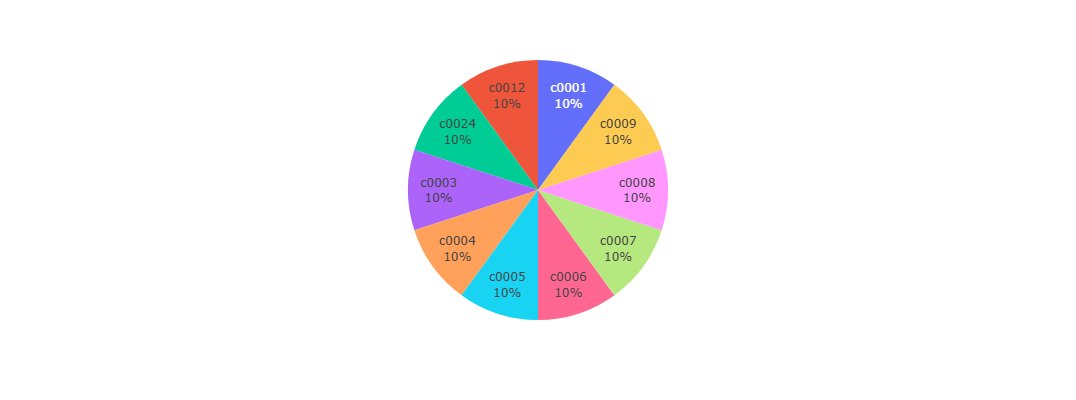


#######################################################
Taken Categorical Column: CustomerName
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 200
Category Names:
['lawrence carroll' 'elizabeth lutz' 'michael rivera' 'kathleen rodriguez'
 'laura weber' 'brittany palmer' 'paul graves' 'david li' 'joy clark'
 'aaron cox' 'bryan mathews' 'kevin may' 'lauren buchanan'
 'deborah wilcox' 'tina duran' 'emily woods' 'jennifer king'
 'tyler haynes' 'brandon rodriguez' 'mr. manuel conway' 'robert blanchard'
 'teresa esparza' 'nicholas cain' 'michele cooley' 'gregory odom'
 'sara miller' 'justin heath' 'jennifer pena' 'erin manning' 'mark brock'
 'tina miller' 'dustin campbell' 'tyler holt' 'dalton perez'
 'brianna richardson' 'brian aguilar dds' 'linda smith' 'jeffrey perkins'
 'angela harris' 'michael harrell' 'lindsey deleon' 'heather riley'
 'sandy short md' 'kenneth alexander' 'michael williams' 'beth cardenas'

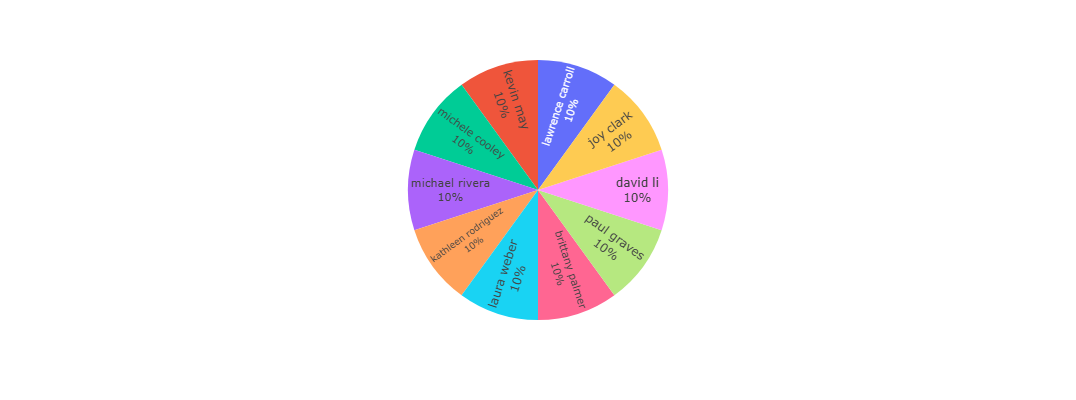


#######################################################
Taken Categorical Column: Region
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 4
Category Names:
['south america' 'asia' 'north america' 'europe']

Value Counts (FD) of each Category:
Region
south america    59
europe           50
north america    46
asia             45
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Region
south america    29.5
europe           25.0
north america    23.0
asia             22.5
Name: count, dtype: float64

Mode: south america

Visual - Pie Chart:

Top Catgeories:


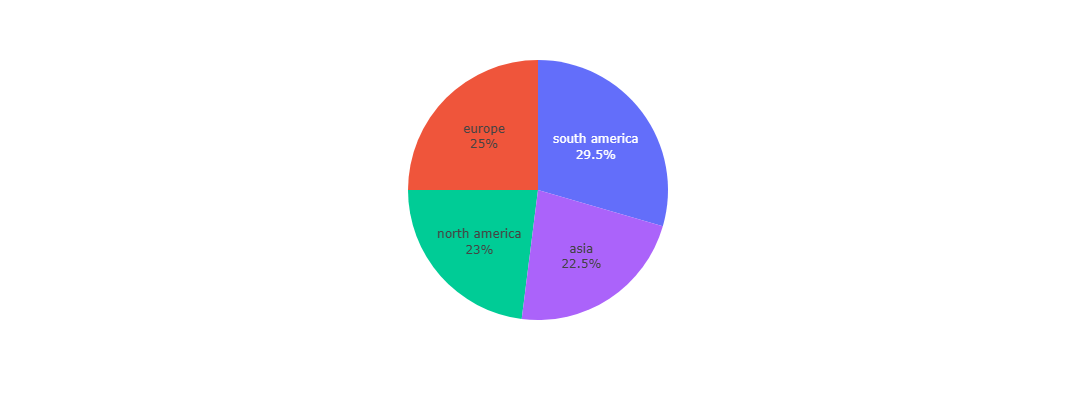


#######################################################
Taken Date Column: SignupDate
#######################################################

Uni-Variate Descriptive Stats:

Start Date: 2022-01-22 00:00:00
End Date: 2024-12-28 00:00:00
Total Time Period (in Years): 2.9342465753424656


In [240]:

for col in raw.columns:
    if raw[col].dtype == object:
        uni.catstudy(raw, col)
    elif raw[col].dtype == 'float64':
        uni.ncstudy(raw, col)
    elif raw[col].dtype == 'int64':
        uni.ndstudy(raw, col)
    elif raw[col].dtype == 'datetime64[ns]':
        uni.datestudy(raw, col)

#######################################################
Taken Categorical Column: ProductID
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 100
Category Names:
['p001' 'p002' 'p003' 'p004' 'p005' 'p006' 'p007' 'p008' 'p009' 'p010'
 'p011' 'p012' 'p013' 'p014' 'p015' 'p016' 'p017' 'p018' 'p019' 'p020'
 'p021' 'p022' 'p023' 'p024' 'p025' 'p026' 'p027' 'p028' 'p029' 'p030'
 'p031' 'p032' 'p033' 'p034' 'p035' 'p036' 'p037' 'p038' 'p039' 'p040'
 'p041' 'p042' 'p043' 'p044' 'p045' 'p046' 'p047' 'p048' 'p049' 'p050'
 'p051' 'p052' 'p053' 'p054' 'p055' 'p056' 'p057' 'p058' 'p059' 'p060'
 'p061' 'p062' 'p063' 'p064' 'p065' 'p066' 'p067' 'p068' 'p069' 'p070'
 'p071' 'p072' 'p073' 'p074' 'p075' 'p076' 'p077' 'p078' 'p079' 'p080'
 'p081' 'p082' 'p083' 'p084' 'p085' 'p086' 'p087' 'p088' 'p089' 'p090'
 'p091' 'p092' 'p093' 'p094' 'p095' 'p096' 'p097' 'p098' 'p099' 'p100']

Value Counts (FD) of each Category:
ProductID
p

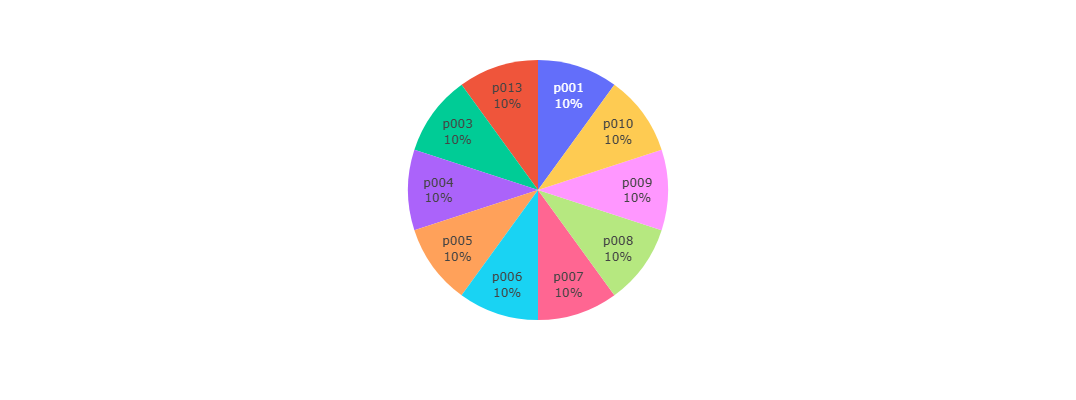


#######################################################
Taken Categorical Column: ProductName
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 66
Category Names:
['activewear biography' 'activewear smartwatch' 'comfortliving biography'
 'bookworld rug' 'techpro t-shirt' 'activewear rug' 'soundwave cookbook'
 'bookworld bluetooth speaker' 'bookworld wall art'
 'comfortliving smartwatch' 'soundwave desk lamp'
 'comfortliving headphones' 'bookworld smartwatch' 'activewear jacket'
 'homesense headphones' 'activewear running shoes' 'activewear textbook'
 'comfortliving mystery book' 'comfortliving sweater' 'soundwave rug'
 'homesense wall art' 'activewear cookware set'
 'soundwave bluetooth speaker' 'soundwave headphones'
 'homesense desk lamp' 'techpro headphones' 'activewear cookbook'
 'bookworld cookbook' 'homesense t-shirt' 'activewear t-shirt'
 'bookworld jacket' 'soundwave smartwatch' 'techpro vase'
 'tec

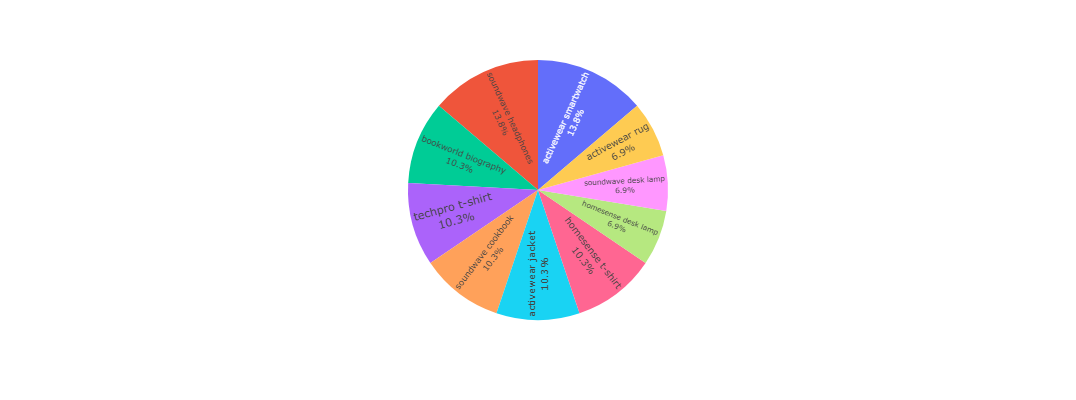


#######################################################
Taken Categorical Column: Category
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 4
Category Names:
['books' 'electronics' 'home decor' 'clothing']

Value Counts (FD) of each Category:
Category
books          26
electronics    26
clothing       25
home decor     23
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Category
books          26.0
electronics    26.0
clothing       25.0
home decor     23.0
Name: count, dtype: float64

Mode: books

Visual - Pie Chart:

Top Catgeories:


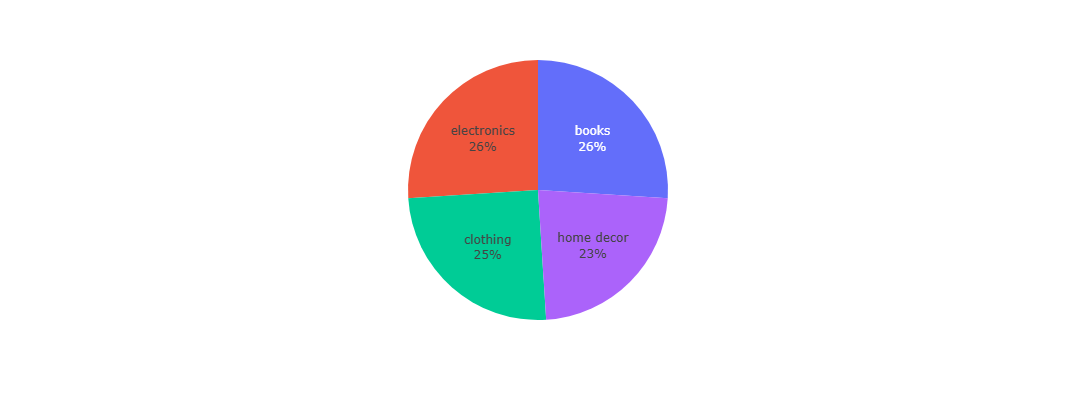


#######################################################
Taken Numeric Continuous Column: Price
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 267.55
Median: 292.875
Mode: 16.08

******** Measures of Dispersion ************
Range: 481.68
Variance: 20511.79
Standard Deviation: 143.22
Five Number Summary:
min     16.08
25%    147.77
50%    292.88
75%    397.09
max    497.76
Name: Price, dtype: float64

******** Measures of Symmetry ************
Skewness: -0.21
Kurtosis: -1.25

Visual - Distplot (Histogram + Desnsity plot):



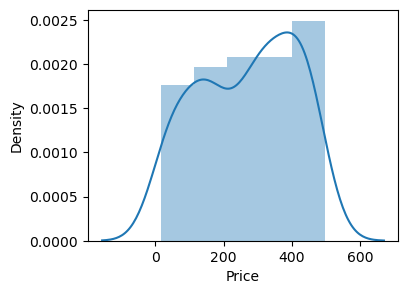

In [241]:
for col in pro.columns:
    if pro[col].dtype == object:
        uni.catstudy(pro, col)
    elif pro[col].dtype == 'float64':
        uni.ncstudy(pro, col)
    elif pro[col].dtype == 'int64':
        uni.ndstudy(pro, col)
    elif pro[col].dtype == 'datetime64[ns]':
        uni.datestudy(pro, col)

#######################################################
Taken Categorical Column: TransactionID
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 1000
Category Names:
['t00001' 't00112' 't00166' 't00272' 't00363' 't00442' 't00490' 't00536'
 't00564' 't00631' 't00727' 't00729' 't00797' 't00002' 't00063' 't00093'
 't00127' 't00270' 't00358' 't00518' 't00546' 't00982' 't00003' 't00013'
 't00017' 't00046' 't00091' 't00161' 't00184' 't00218' 't00417' 't00492'
 't00605' 't00615' 't00619' 't00703' 't00962' 't00004' 't00105' 't00136'
 't00237' 't00239' 't00310' 't00470' 't00551' 't00563' 't00567' 't00620'
 't00650' 't00818' 't00923' 't00970' 't00005' 't00037' 't00206' 't00208'
 't00485' 't00488' 't00497' 't00684' 't00846' 't00875' 't00880' 't00953'
 't00006' 't00010' 't00175' 't00269' 't00293' 't00568' 't00602' 't00744'
 't00952' 't00968' 't00007' 't00089' 't00158' 't00349' 't00455' 't00501'
 't00721' 't00749' 't009

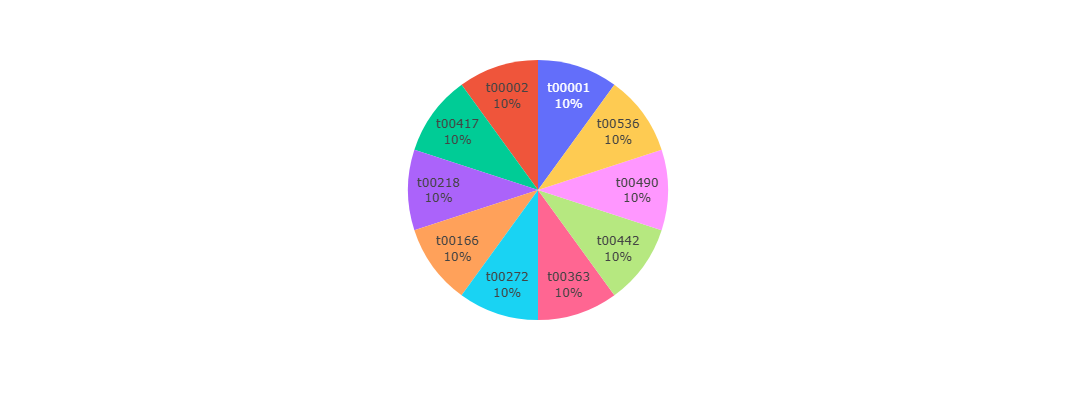


#######################################################
Taken Categorical Column: CustomerID
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 199
Category Names:
['c0199' 'c0146' 'c0127' 'c0087' 'c0070' 'c0188' 'c0195' 'c0008' 'c0157'
 'c0130' 'c0051' 'c0075' 'c0155' 'c0092' 'c0088' 'c0109' 'c0041' 'c0101'
 'c0154' 'c0200' 'c0049' 'c0103' 'c0028' 'c0183' 'c0190' 'c0055' 'c0148'
 'c0035' 'c0120' 'c0017' 'c0145' 'c0004' 'c0010' 'c0065' 'c0132' 'c0068'
 'c0123' 'c0018' 'c0064' 'c0121' 'c0161' 'c0173' 'c0150' 'c0176' 'c0167'
 'c0184' 'c0034' 'c0053' 'c0102' 'c0134' 'c0086' 'c0036' 'c0056' 'c0076'
 'c0194' 'c0124' 'c0024' 'c0139' 'c0133' 'c0012' 'c0128' 'c0158' 'c0164'
 'c0067' 'c0142' 'c0032' 'c0063' 'c0113' 'c0136' 'c0172' 'c0125' 'c0002'
 'c0122' 'c0071' 'c0162' 'c0141' 'c0156' 'c0191' 'c0147' 'c0138' 'c0153'
 'c0043' 'c0135' 'c0091' 'c0168' 'c0069' 'c0066' 'c0186' 'c0023' 'c0105'
 'c0072' 'c0093' 'c0009' 'c

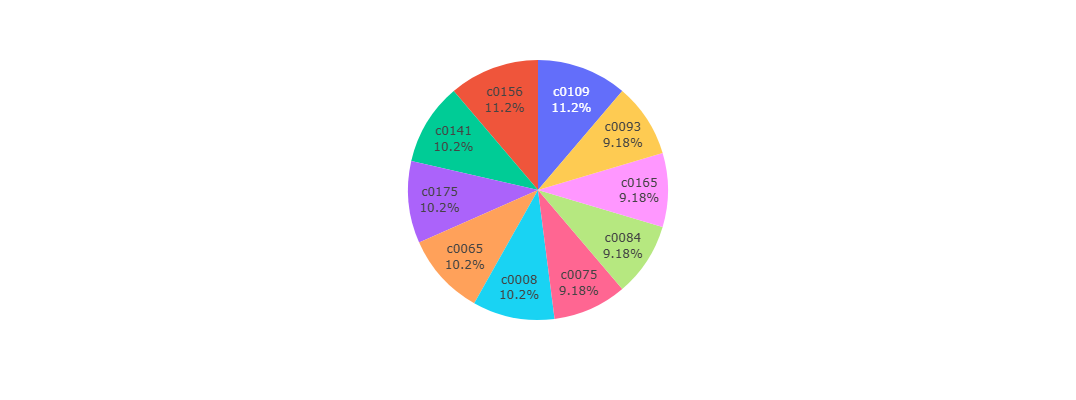


#######################################################
Taken Categorical Column: ProductID
#######################################################

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 100
Category Names:
['p067' 'p034' 'p057' 'p049' 'p087' 'p053' 'p023' 'p069' 'p095' 'p062'
 'p041' 'p060' 'p054' 'p070' 'p010' 'p040' 'p007' 'p038' 'p085' 'p061'
 'p084' 'p003' 'p051' 'p086' 'p047' 'p068' 'p092' 'p076' 'p036' 'p013'
 'p058' 'p050' 'p030' 'p025' 'p027' 'p078' 'p100' 'p039' 'p016' 'p022'
 'p021' 'p072' 'p059' 'p031' 'p042' 'p074' 'p032' 'p009' 'p081' 'p011'
 'p096' 'p017' 'p048' 'p052' 'p065' 'p063' 'p089' 'p088' 'p066' 'p015'
 'p001' 'p093' 'p073' 'p006' 'p055' 'p064' 'p090' 'p018' 'p083' 'p043'
 'p035' 'p033' 'p014' 'p004' 'p029' 'p097' 'p080' 'p099' 'p019' 'p020'
 'p044' 'p002' 'p056' 'p082' 'p012' 'p075' 'p005' 'p028' 'p094' 'p079'
 'p024' 'p008' 'p091' 'p071' 'p098' 'p026' 'p045' 'p046' 'p077' 'p037']

Value Counts (FD) of each Category:
ProductID


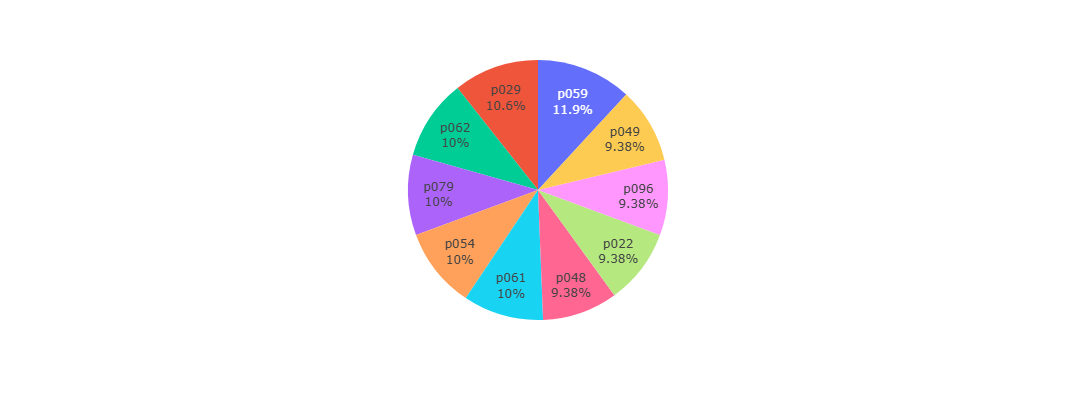


#######################################################
Taken Date Column: TransactionDate
#######################################################

Uni-Variate Descriptive Stats:

Start Date: 2023-12-30 15:29:12
End Date: 2024-12-28 11:00:00
Total Time Period (in Years): 0.9945205479452055
#######################################################
Taken Numeric Discrete Column: Quantity
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 3
Median: 3
Mode: 4

******** Measures of Dispersion ************
Range: 3
Variance: 1
Standard Deviation: 1
Five Number Summary:
min    1.0
25%    2.0
50%    3.0
75%    4.0
max    4.0
Name: Quantity, dtype: float64

******** Measures of Symmetry ************
Skewness: -0.05
Kurtosis: -1.36

Visual - Distplot (Histogram + Desnsity plot):



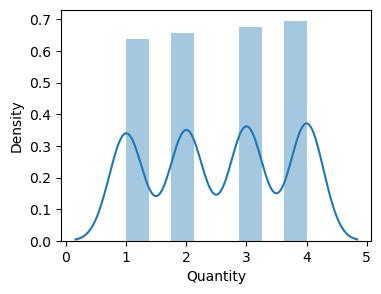

#######################################################
Taken Numeric Continuous Column: TotalValue
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 690.0
Median: 588.88
Mode: 412.62

******** Measures of Dispersion ************
Range: 1974.96
Variance: 243191.48
Standard Deviation: 493.14
Five Number Summary:
min      16.08
25%     295.29
50%     588.88
75%    1011.66
max    1991.04
Name: TotalValue, dtype: float64

******** Measures of Symmetry ************
Skewness: 0.64
Kurtosis: -0.63

Visual - Distplot (Histogram + Desnsity plot):



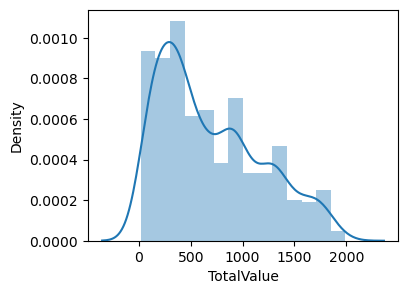

#######################################################
Taken Numeric Continuous Column: Price
#######################################################

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 272.55
Median: 299.93
Mode: 303.2

******** Measures of Dispersion ************
Range: 481.68
Variance: 19806.73
Standard Deviation: 140.74
Five Number Summary:
min     16.08
25%    147.95
50%    299.93
75%    404.40
max    497.76
Name: Price, dtype: float64

******** Measures of Symmetry ************
Skewness: -0.23
Kurtosis: -1.24

Visual - Distplot (Histogram + Desnsity plot):



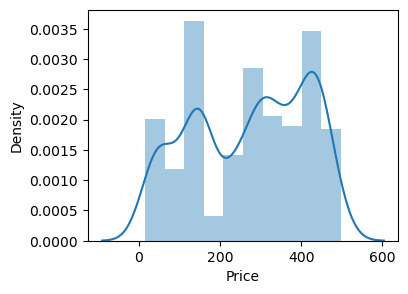

In [243]:
for col in tran.columns:
    if tran[col].dtype == object:
        uni.catstudy(tran, col)
    elif tran[col].dtype == 'float64':
        uni.ncstudy(tran, col)
    elif tran[col].dtype == 'int64':
        uni.ndstudy(tran, col)
    elif tran[col].dtype == 'datetime64[ns]':
        uni.datestudy(tran, col)

## Bi-Variate

In [247]:
merged_df = tran.merge(raw, on='CustomerID').merge(pro, on='ProductID')

In [249]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,YearMonth,CustomerName,Region,SignupDate,SignupYear,ProductName,Category,Price_y
0,t00001,c0199,p067,2024-08-25 12:38:23,1,300.68,300.68,2024-08,andrea jenkins,europe,2022-12-03,2022,comfortliving bluetooth speaker,electronics,300.68
1,t00112,c0146,p067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,brittany harvey,asia,2024-09-04,2024,comfortliving bluetooth speaker,electronics,300.68
2,t00166,c0127,p067,2024-04-25 07:38:55,1,300.68,300.68,2024-04,kathryn stevens,europe,2024-04-04,2024,comfortliving bluetooth speaker,electronics,300.68
3,t00272,c0087,p067,2024-03-26 22:55:37,2,601.36,300.68,2024-03,travis campbell,south america,2024-04-11,2024,comfortliving bluetooth speaker,electronics,300.68
4,t00363,c0070,p067,2024-03-21 15:10:10,3,902.04,300.68,2024-03,timothy perez,europe,2022-03-15,2022,comfortliving bluetooth speaker,electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,t00496,c0118,p037,2024-10-24 08:30:27,1,459.86,459.86,2024-10,jacob holt,south america,2022-01-22,2022,soundwave smartwatch,electronics,459.86
996,t00759,c0059,p037,2024-06-04 02:15:24,3,1379.58,459.86,2024-06,mrs. kimberly wright,north america,2024-04-07,2024,soundwave smartwatch,electronics,459.86
997,t00922,c0018,p037,2024-04-05 13:05:32,4,1839.44,459.86,2024-04,tyler haynes,north america,2024-09-21,2024,soundwave smartwatch,electronics,459.86
998,t00959,c0115,p037,2024-09-29 10:16:02,2,919.72,459.86,2024-09,joshua hamilton,asia,2024-11-11,2024,soundwave smartwatch,electronics,459.86


In [321]:
# Revenue by region
revenue_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:")
print(revenue_by_region)

Revenue by Region:
Region
south america    219352.56
europe           166254.63
north america    152313.40
asia             152074.97
Name: TotalValue, dtype: float64


In [323]:
# Revenue by product category
revenue_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Product Category:")
print(revenue_by_category)

Revenue by Product Category:
Category
books          192147.47
electronics    180783.50
clothing       166170.66
home decor     150893.93
Name: TotalValue, dtype: float64


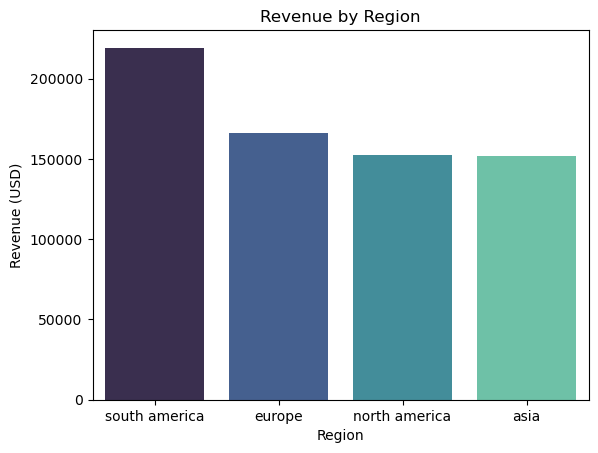

In [317]:
# Visualize revenue by region
plt.figure()
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="mako")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue(USD)")
plt.show()


In [299]:
top_region = revenue_by_region.idxmax()
top_region_revenue = revenue_by_region.max()


The region with the highest revenue is south america, contributing 219352.56 USD.


In [309]:
print(f"The region with the highest revenue is {top_region}, contributing {top_region_revenue:.2f} USD.")

The region with the highest revenue is south america, contributing 219352.56 USD.


In [301]:
# 2. Category driving the most revenue
top_category = revenue_by_category.idxmax()
top_category_revenue = revenue_by_category.max()


Insight 2: The top-performing category is books, generating 192147.47 USD in revenue.


In [311]:
print(f"Insight 2: The top-performing category is {top_category}, generating {top_category_revenue:.2f} USD in revenue.")

Insight 2: The top-performing category is books, generating 192147.47 USD in revenue.


In [303]:
# 3. Customer behavior based on signup year
recent_customers = raw[raw['SignupYear'] >= 2020]
recent_customers_count = len(recent_customers)


Customers who signed up after 2020 account for 200 out of 200 customers.


In [313]:
print(f"Customers who signed up after 2020 account for {recent_customers_count} out of {len(raw)} customers.")

Customers who signed up after 2020 account for 200 out of 200 customers.


In [282]:
average_price = pro['Price'].mean()


The average price of products is 267.55 USD.


In [315]:
print(f"The average price of products is {average_price:.2f} USD.")

The average price of products is 267.55 USD.


<Axes: >

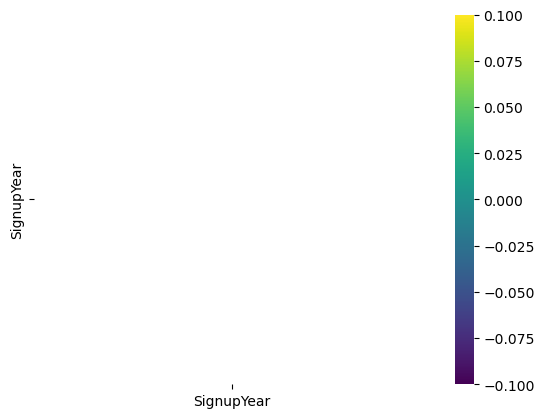

In [333]:
lower = np.triu(raw.corr(numeric_only=True))
sns.heatmap(raw.corr(numeric_only=True), annot=True, cmap='viridis', mask=lower)

<Axes: >

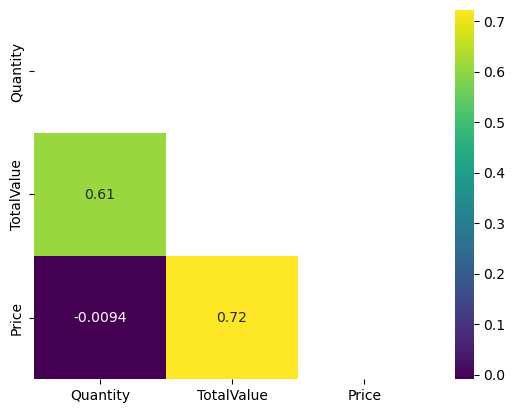

In [329]:
lower = np.triu(tran.corr(numeric_only=True))
sns.heatmap(tran.corr(numeric_only=True), annot=True, cmap='viridis', mask=lower)

<Axes: >

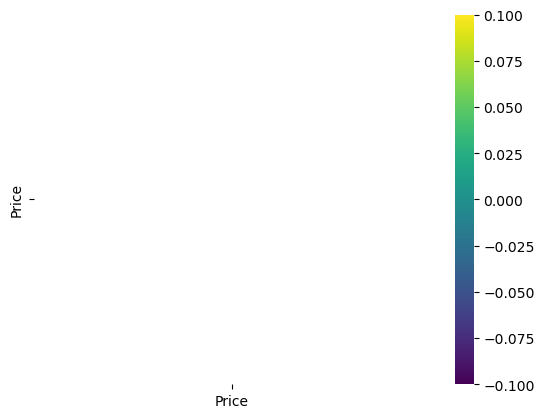

In [335]:
lower = np.triu(pro.corr(numeric_only=True))
sns.heatmap(pro.corr(numeric_only=True), annot=True, cmap='viridis', mask=lower)

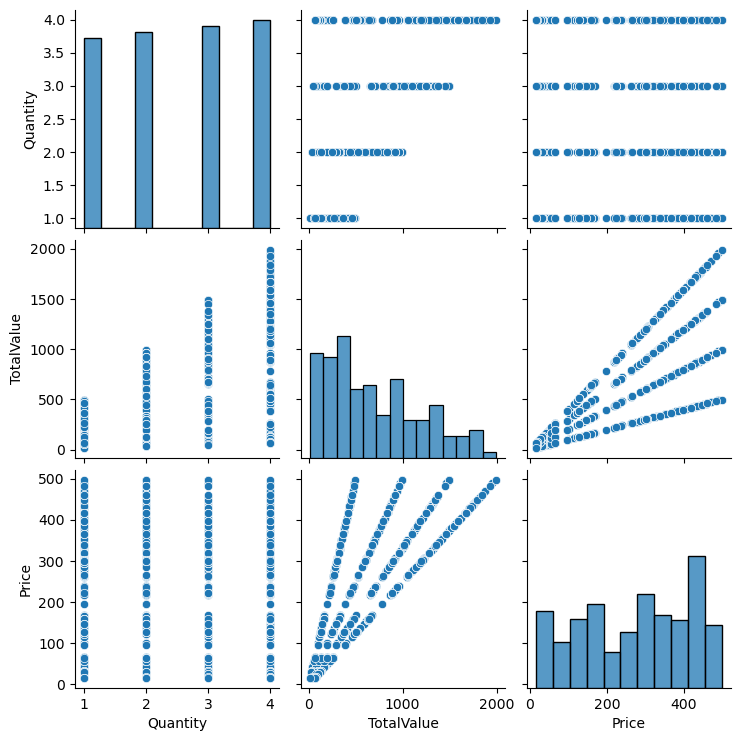

In [353]:
sns.pairplot(tran)

## Business Insights

* 
* The top-performing category is books, generating 192147.47 USD in revenue.
* Customers who signed up after 2020 account for 200 out of 200 customers
* The average price of products is 267.55 USD.
* The region with the highest revenue is south america, contributing 219352.56 USD.
* The majority of customers are from South America, making it the dominant region in the dataset, followed by Europe, North America, and Asia.
* Price data shows a wide range from $16.08 to $497.76, with a mean of $267.55, indicating significant variability. The distribution is slightly ** negatively skewed, suggesting a tendency for higher-priced items.
* The quantity of products sold is consistently low (mainly 1 to 4 items), with a nearly symmetric distribution and slight negative skewness.


In [348]:
merged_df.to_csv("Merged_Data.csv", index=False)